In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

imagesDir = 'images'
calibrationDir = 'images/calibration'

## Calibrating the camera

In [5]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6 * 9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane.

# Make a list of calibration images
images = glob.glob(os.path.join(calibrationDir, 'calibration*.jpg'))

# Step through the list and search for chessboard corners
for filename in images:

    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    pattern_found, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    if pattern_found is True:
        objpoints.append(objp)
        imgpoints.append(corners)


ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# n sei o q faz, temos de rever isto



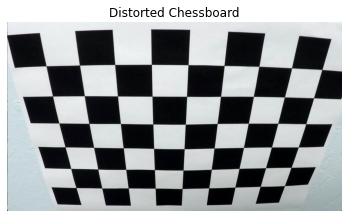

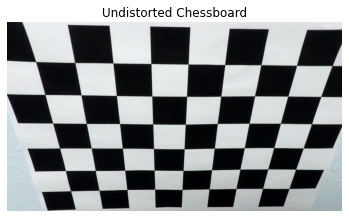

In [6]:
distorted_chessboard = cv2.imread(os.path.join(imagesDir, 'calibration_before.jpg'))
undistorted_chessboard = cv2.undistort(distorted_chessboard, mtx, dist, None, mtx)

plt.imshow(distorted_chessboard)
plt.title('Distorted Chessboard')
plt.axis('off')
plt.show()

plt.imshow(undistorted_chessboard)
plt.title('Undistorted Chessboard')
plt.axis('off')
plt.show()

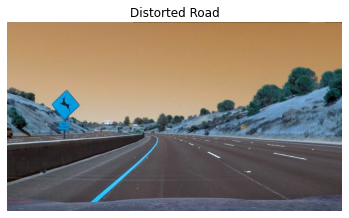

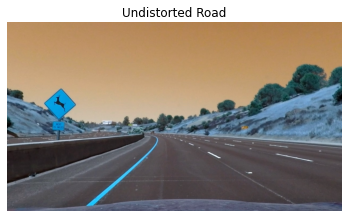

In [14]:
# test with a road image
distorted_road = cv2.imread(os.path.join(imagesDir, 'road_test1.jpg'))
undistorted_road = cv2.undistort(distorted_road, mtx, dist, None, mtx)

plt.imshow(distorted_road)
plt.title('Distorted Road')
plt.axis('off')
plt.show()

plt.imshow(undistorted_road)
plt.title('Undistorted Road')
plt.axis('off')
plt.show()

#cores trocadas n sei pq

## Detect edges

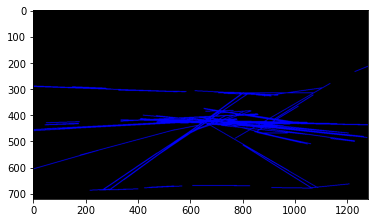

In [20]:
# load input image
img = cv2.imread(os.path.join(imagesDir, 'road_test2.jpg'))

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# perform Hough transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=100)

# create a black image for visualization
vis = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# draw detected lines on the black image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(vis)

## Create bird's eye image

In [15]:
def birdeye(img):
    h, w = img.shape[:2]

    src = np.float32([[w, h-10],    # br
                      [0, h-10],    # bl
                      [546, 460],   # tl
                      [732, 460]])  # tr
    dst = np.float32([[w, h],       # br
                      [0, h],       # bl
                      [0, 0],       # tl
                      [w, 0]])      # tr

    M = cv2.getPerspectiveTransform(src, dst)

    birdseye_img = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)

    return birdseye_img, M



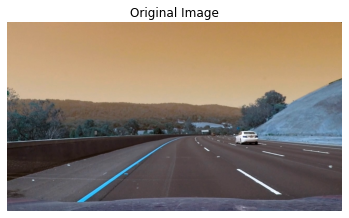

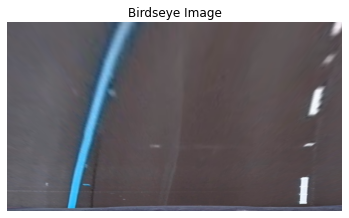

In [16]:
img = cv2.imread(os.path.join(imagesDir, 'road_test2.jpg'))

birdseye_img, M = birdeye(img)

plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.imshow(birdseye_img)
plt.title('Birdseye Image')
plt.axis('off')
plt.show()


In [17]:
import cv2
import numpy as np

# create a black image for visualization
vis = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# draw detected lines on the black image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 2)

# define the region of interest based on the detected lines
roi_points = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    roi_points.append([x1, y1])
    roi_points.append([x2, y2])

# convert ROI points to NumPy array
roi_points = np.array(roi_points)

# define the corresponding points in the bird's eye view image
height, width, _ = img.shape
dst_points = np.float32([[0, height], [0, 0], [width, 0], [width, height]])

# calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(roi_points, dst_points)

# apply perspective transform to the input image
birdseye = cv2.warpPerspective(img, M, (width, height))

# display the input image and the bird's eye view image side by side
cv2.imshow('Input Image', img)
cv2.imshow('Birdseye View', birdseye)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3522: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'cv::getPerspectiveTransform'
